# 911 Calls Capstone Project

For this capstone project I have analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [35]:
import numpy as np
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [37]:
df=pd.read_csv("911.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [40]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [41]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [42]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Lets use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [43]:
df['Reason']=df['title'].apply(lambda x : x.split(sep=':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [44]:
df['Reason'].value_counts() ### EMS is the most common reason!

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

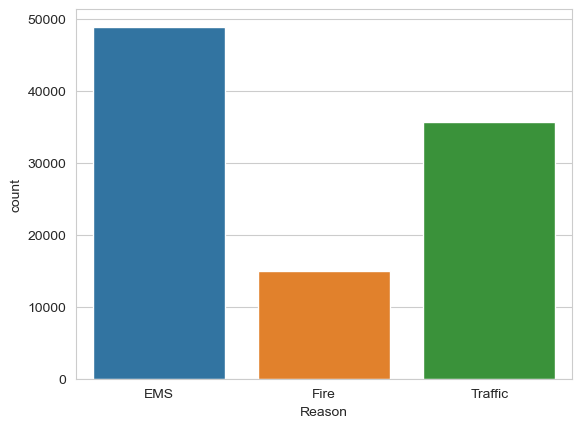

In [45]:
sns.countplot(data=df,x=df['Reason'])

___
** Now let us begin to focus on time information.

In [46]:
type(df['timeStamp'][0])

str

Converting timeStamp column to Datetime 

In [47]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [48]:
df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Reason               object
dtype: object

Creating 3 columns by extracting hour,month and day of the week

In [49]:
df['Hour']=df['timeStamp'].apply(lambda x : x.hour)
df['Month']=df['timeStamp'].apply(lambda x : x.month)
df['Day_of_week']=df['timeStamp'].apply(lambda x : x.day_name())

 Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

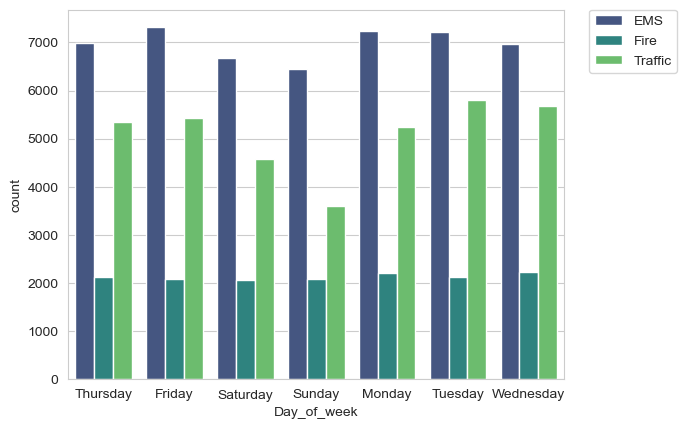

In [50]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Day_of_week',hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Insights :
### From the above chart, it can be seen that, 911 calls due to Fire are not affected by the day of the week.In case of EMS and Fire, 911 class are usually less during weekends as compared to weekdays

Doing the same analysis for months

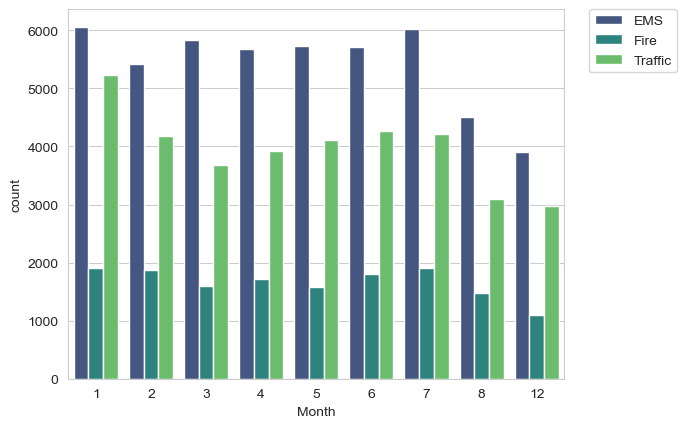

In [51]:
sns.countplot(data=df,x='Month',hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Insights :
### From the above chart, it can be seen that, 911 calls are less towards end of the year, i.e during the month 12 which is December


From the above chart, it can be noticed there are some missing Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas.

** Now we will create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation.

In [52]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now we will create a simple plot out of the dataframe which will denote count of the calls 

<AxesSubplot:xlabel='Month'>

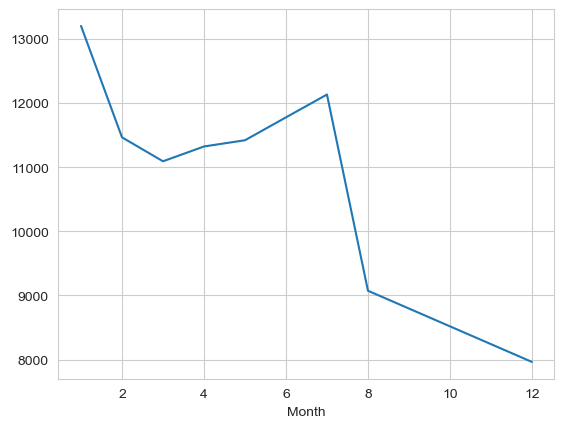

In [53]:
byMonth['twp'].plot()

## Insights :
### From the above chart, it can be seen that, 911 calls are high in number during start of the year and then the calls decrease to a significant amount during last few months of the year

** Let's Create a new column called 'Date' that contains the date from the timeStamp column. 

In [54]:
df['Date']=df['timeStamp'].apply(lambda x : x.date())

We will group the data by date column and get a count of calls

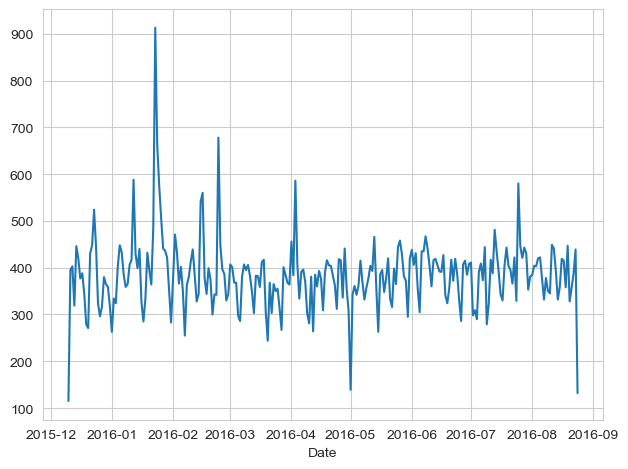

In [55]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

### From the above visualization, it can be seen that there are some upward and downward spikes in the number of 911 calls. Lets anayze the spikes on the basis of reason of the calls.

We will recreate this plot by creating 3 separate plots with each plot representing a Reason for the 911 call**

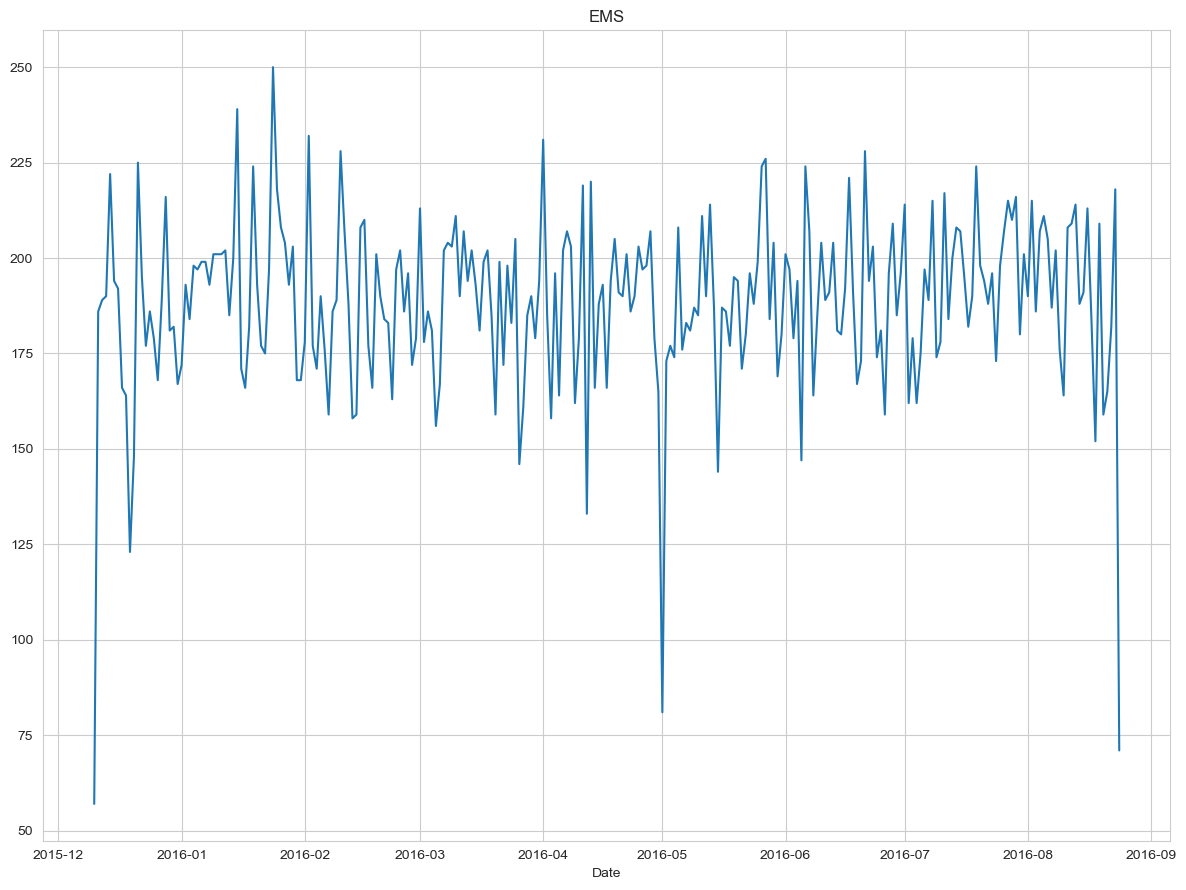

In [57]:
plt.figure(figsize=(12,9))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

## Insights :
### From the above chart, it can be seen that, 911 calls due to EMS are between 150 to 225 throughout the dates.However, ther were some downward spikes (decrease in the number of calls ) during December 2012, May 2016 and September 2016.

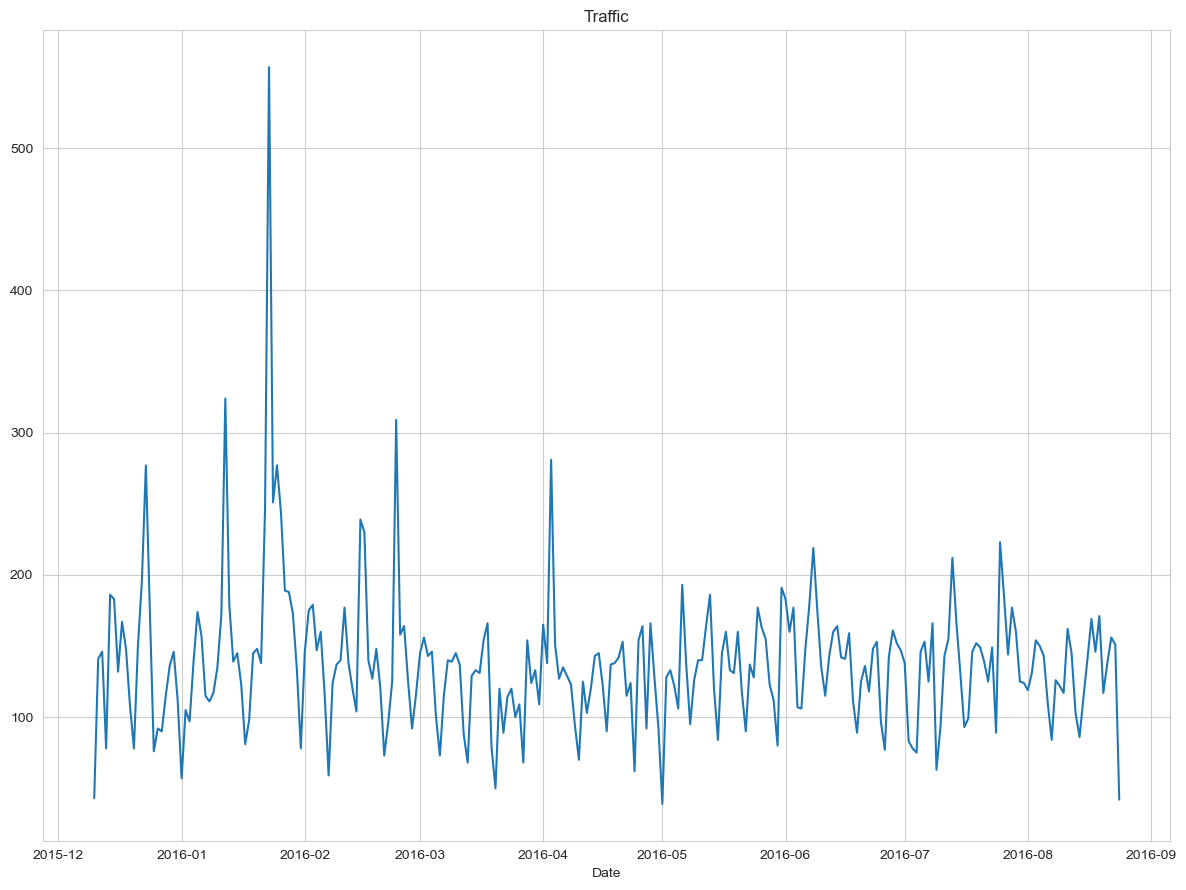

In [58]:
plt.figure(figsize=(12,9))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

## Insights :
### From the above chart, it can be seen that, 911 calls due to Traffic are between 75 to 200 throughout the dates.However, ther were some upward spikes (increase in the number of calls ) from December 2015 to March 2016. 

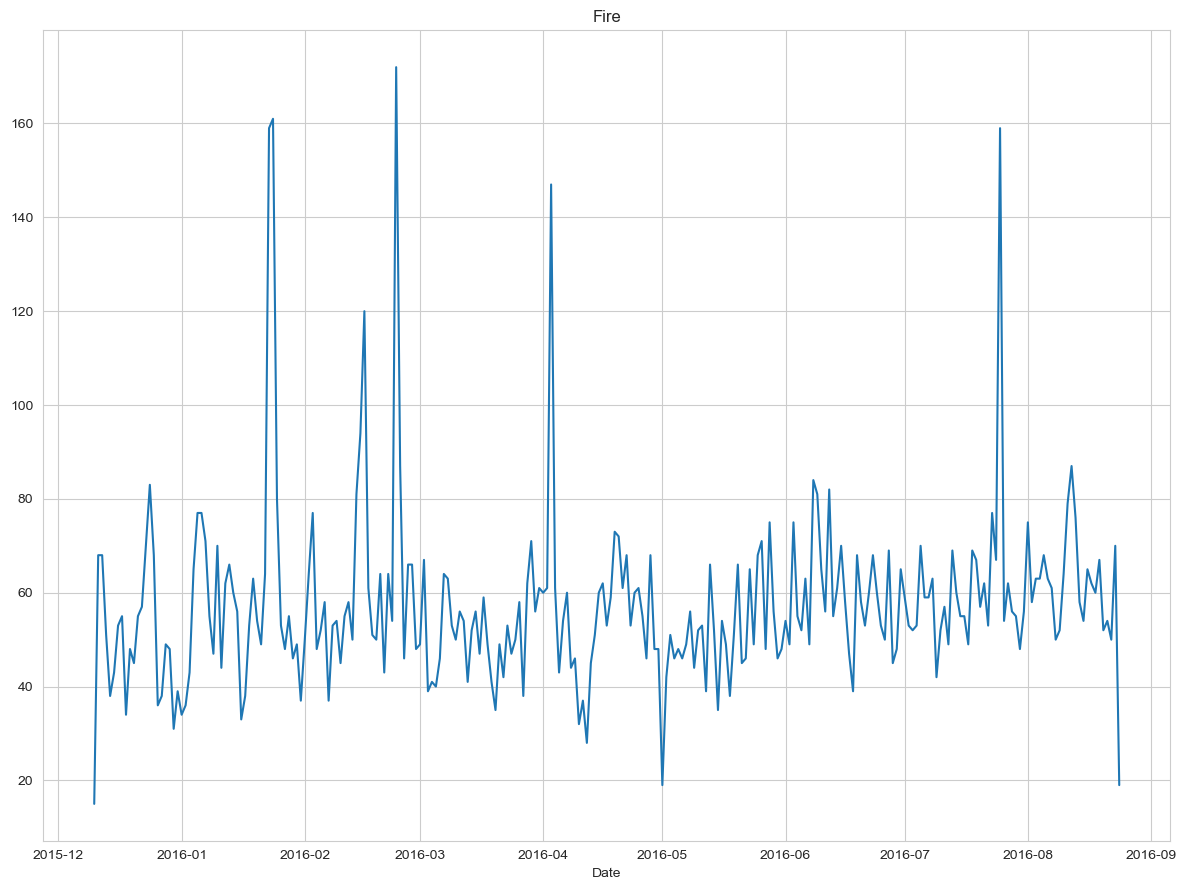

In [59]:
plt.figure(figsize=(12,9))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

## Insights :
### From the above chart, it can be seen that, 911 calls due to Fire incidents are between 40 to 80 throughout the dates.However, ther were some upward spikes (increase in the number of calls ) during late of January 2016, late of February 2016 , April 2016 and late of July 2016

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [30]:
day_hour=df.groupby(['Day_of_week','Hour']).count()['twp'].unstack()
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Monday,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Saturday,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sunday,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wednesday,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day_of_week'>

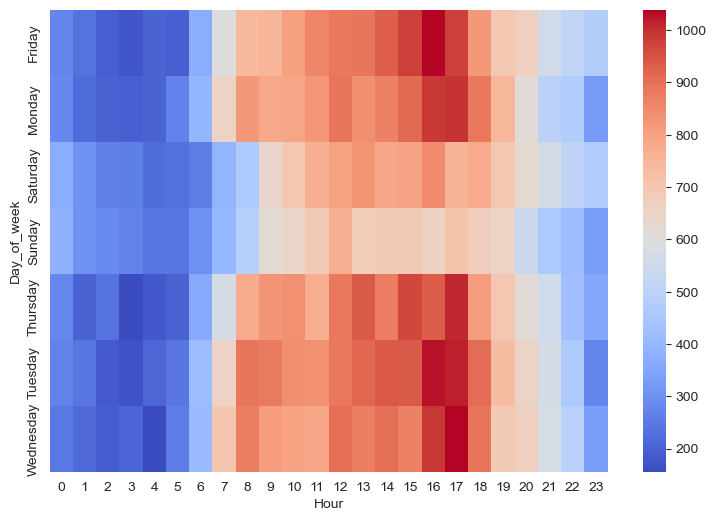

In [32]:
plt.figure(figsize=(9,6))
sns.heatmap(day_hour,cmap='coolwarm')


## Insights :
### From the heatmap, it can be seen that, the number of 911 calss are higher 8 am to 6 pm and on weekdays.

** Now create a clustermap using this DataFrame. **

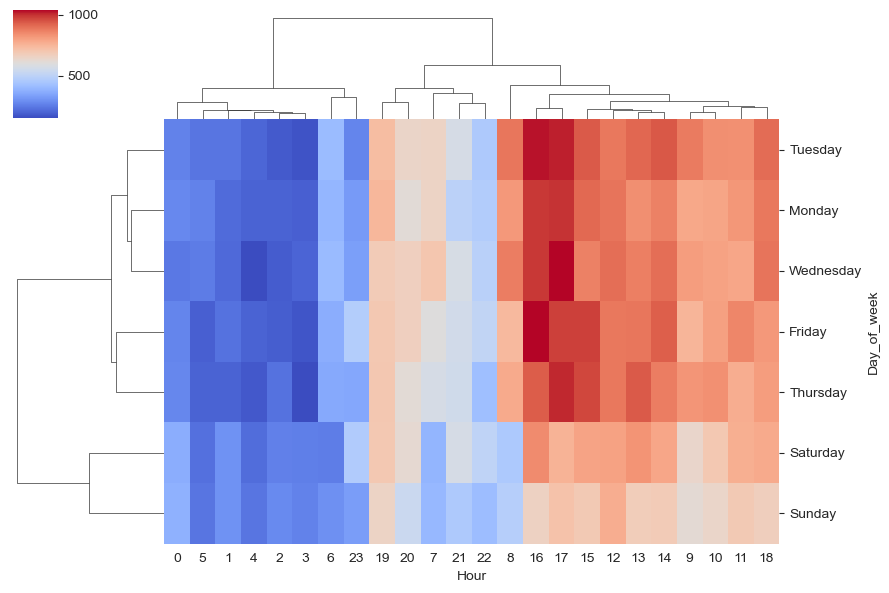

In [33]:
sns.clustermap(day_hour,figsize=(9,6),cmap='coolwarm')

## Insights :
### From the clustermap above, we can see clusters of similar data points within our dataset. We can observe that Tuesdays, Wednesdays and Mondays have similarity in the number of 911 calls(highest). Fridays and Thursdays have similarities(high) while weekends have similarities in the number of 911 calls(low)
### It can also be observed that, the count of 911 calls is similar for the timeframes:
### -->11 pm to 6am(low)
### --> 4 pm to 6pm(high)

** Now we will repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [60]:
day_month=df.groupby(['Day_of_week','Month']).count()['twp'].unstack()
day_month

Month,1,2,3,4,5,6,7,8,12
Day_of_week,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tuesday,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wednesday,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot:xlabel='Month', ylabel='Day_of_week'>

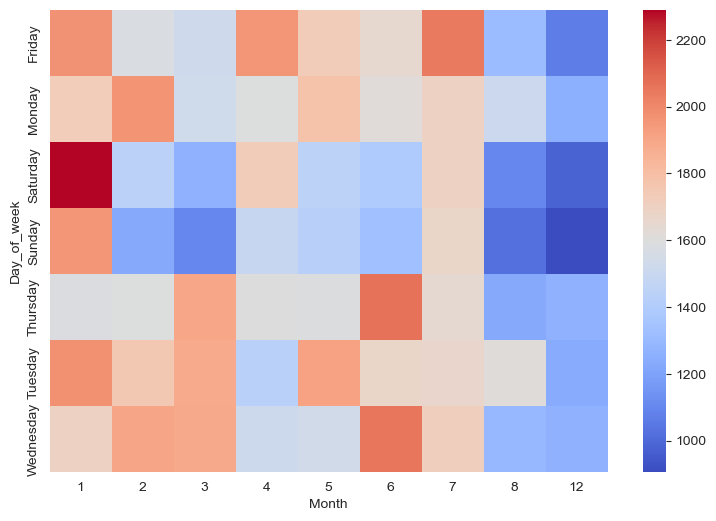

In [63]:
plt.figure(figsize=(9,6))
sns.heatmap(day_month,cmap='coolwarm')

## Insights
### From the above heatmap, it can be observed that least number of 911 calls are between August to December and on Wednesdays, Thursdays and Tuesdays.


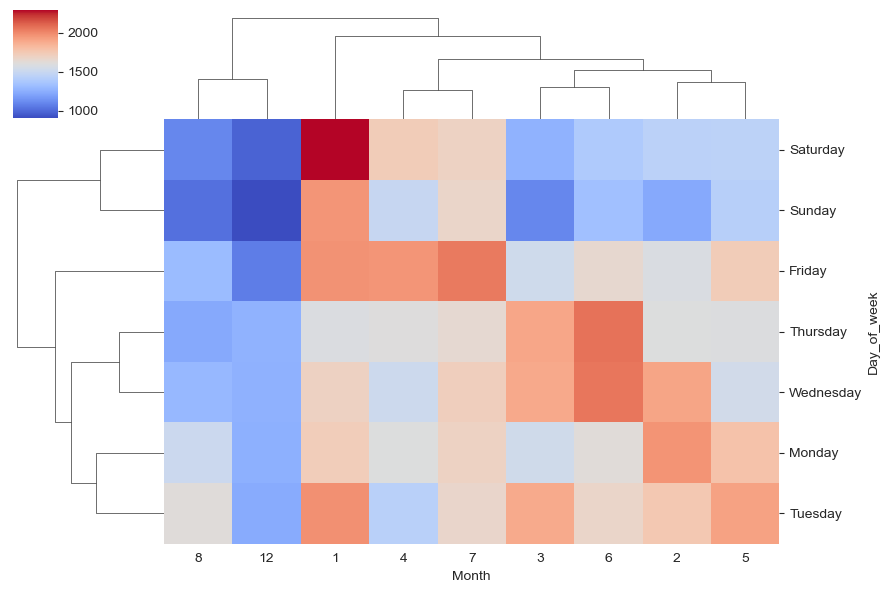

In [41]:
sns.clustermap(day_month,figsize=(9,6),cmap='coolwarm')

## Insights :
### From the clustermap above, we can see clusters of similar data points within our dataset. We can observe that Tuesdays, Wednesdays and Mondays have similarity in the number of 911 calls(highest). Fridays and Thursdays have similarities(high) while weekends have similarities in the number of 911 calls(low)
### It can also be observed that, the count of 911 calls is similar for few months:
### -->August to December (low)
### -->January,April and July(high)
### --> March,June,February and May (high)

### It can also be observed that most number of 911 calls were on Saturday in January